# Answer: 1

In [130]:
import numpy as np
import pandas as pd

In [131]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep ="|")

In [132]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [133]:
print("The mean age per occupation : ")
users.groupby("occupation").age.mean()

The mean age per occupation : 


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [134]:
print(" The Male ratio per occupation :")
gender_count_per_occupation= users.groupby(['occupation', 'gender']).gender.count()
total_number_people = users.groupby('gender').gender.count()
print((gender_count_per_occupation /total_number_people*100).sort_values(ascending=False).xs('M',level=1))

 The Male ratio per occupation :
occupation
student          20.298507
other            10.298507
educator         10.298507
engineer          9.701493
programmer        8.955224
administrator     6.417910
executive         4.328358
scientist         4.179104
technician        3.880597
writer            3.880597
librarian         3.283582
marketing         2.388060
entertainment     2.388060
artist            2.238806
retired           1.940299
lawyer            1.492537
salesman          1.343284
doctor            1.044776
healthcare        0.746269
none              0.746269
homemaker         0.149254
Name: gender, dtype: float64


In [135]:
users.groupby('occupation').age.agg(['min', 'max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [136]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [137]:
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).count()
occup_gender = gender_ocup.div(occup_count*0.01, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Answer: 2

In [138]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')


In [139]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [140]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [141]:
len(euro12.groupby('Team').groups)

16

In [142]:
euro12.shape[1]

35

In [143]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [144]:
discipline.sort_values(by = ["Red Cards", "Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [145]:
euro12.groupby('Team').agg({'Yellow Cards': 'mean'})

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [146]:
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [147]:
euro12[euro12.Team.str.startswith('G')]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [148]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [149]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [150]:
print('The Shooting Accuracy of England, Italy and Russia:')
shooting_accuracy = euro12[['Team', 'Shooting Accuracy']]
SHA_ENG_ITY_RUS = shooting_accuracy[shooting_accuracy.Team.isin(["England","Italy", "Russia"])]
print(SHA_ENG_ITY_RUS)

The Shooting Accuracy of England, Italy and Russia:
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


   # Answer 3:

## step 1:

In [151]:
import pandas as pd
import numpy as np

## step 2:

In [152]:
first = pd.Series(np.random.randint(1,5,100))
second = pd.Series(np.random.randint(1,4,100))
third = pd.Series(np.random.randint(10000,30000,100))

## step 3:

In [153]:
SC = pd.concat([first,second,third],axis=1)
SC.head()

,0,1,2
0,4,1,23029
1,4,1,19850
2,4,2,11052
3,3,1,13474
4,3,2,27901


## step 4

In [154]:
SC.columns = ['bedrs','bathrs','price_sqr_meter']
SC.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,23029
1,4,1,19850
2,4,2,11052
3,3,1,13474
4,3,2,27901


## step 5

In [155]:
big_column = pd.concat([first,second,third],axis=0)
print(big_column)

0         4
1         4
2         4
3         3
4         3
      ...  
95    15532
96    21275
97    15402
98    18050
99    23386
Length: 300, dtype: int32


## step 6

In [156]:
len(pd.concat([first,second,third],axis=0))


300

## step 7

In [157]:
big_column.reset_index(drop=True, inplace=True)
print(big_column)


0          4
1          4
2          4
3          3
4          3
       ...  
295    15532
296    21275
297    15402
298    18050
299    23386
Length: 300, dtype: int32


# Answer 4

## step 1

In [158]:
import pandas as pd
import numpy as np
import datetime as dt

## step 2

In [159]:
data = pd.read_csv("wind.txt",sep = " ")
data

,Yr,Mo,Dy,Unnamed: 3,Unnamed: 4,RPT,Unnamed: 6,Unnamed: 7,VAL,Unnamed: 9,...,MUL,Unnamed: 30,Unnamed: 31,CLO,Unnamed: 33,Unnamed: 34,BEL,Unnamed: 36,Unnamed: 37,MAL
0,61,NaN,1.0,NaN,1.00,15.04,14.96,13.17,NaN,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,NaN,1.0,NaN,2.00,14.71,NaN,NaN,NaN,10.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,NaN,1.0,NaN,3.00,18.50,16.88,12.33,10.13,11.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,NaN,1.0,NaN,4.00,10.58,NaN,6.63,11.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,NaN,1.0,NaN,5.00,13.33,13.25,11.42,NaN,6.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12.0,27.0,17.58,16.96,17.62,NaN,8.08,13.21,11.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,78,12.0,28.0,13.21,NaN,5.46,13.46,NaN,5.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,78,12.0,29.0,14.00,10.29,14.42,NaN,8.71,NaN,9.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,78,12.0,30.0,18.50,14.04,21.29,NaN,9.13,12.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Answer 5

## step 1

In [160]:
import pandas as pd
import numpy as np


## step 2 and 3

In [161]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

## step 4

In [162]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## step 5

In [163]:
chipo.shape


(4622, 5)

# step 6

In [164]:
chipo.shape[1]


5

## step 7

In [165]:
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

## step 8

In [166]:
print(chipo.index)


RangeIndex(start=0, stop=4622, step=1)


## step 9

In [167]:
chipo[chipo.quantity==chipo.quantity.max()]


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


## step 10

In [168]:
chipo[chipo.quantity==chipo.quantity.max()]


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


## step 11

In [169]:
chipo.groupby('choice_description').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).head(1)


,quantity
choice_description,
[Diet Coke],159


## step 12

In [170]:
chipo.quantity.sum()

4972

## step 13

In [171]:
change_dic = {'item_price':float}
chipo_price_float = chipo.astype(change_dic)
print(chipo_price_float.dtypes)
chipo['item_price'] = chipo.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)
print(chipo.dtypes)

ValueError: could not convert string to float: '$2.39 '

## step 14

In [172]:
chipo['item_price'].sum()


'$2.39 $3.39 $3.39 $2.39 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $1.69 $17.50 $4.45 $8.49 $2.39 $17.50 $4.45 $4.45 $11.25 $11.75 $10.98 $8.

# Answer 6:

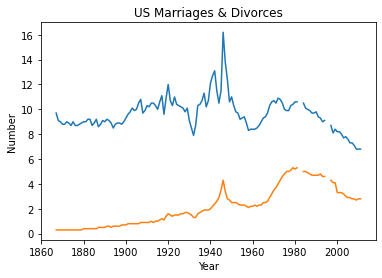

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv



USA_marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')

columns = USA_marriage.columns.drop(['Marriages','Divorces','Population','Year'])

fig,ax= plt.subplots()

for column in columns:

    ax.plot(marriage['Year'],marriage[column])

ax.set_title('US Marriages & Divorces')

ax.set_xlabel('Year')

ax.set_ylabel('Number')

plt.show()

# Answer 7

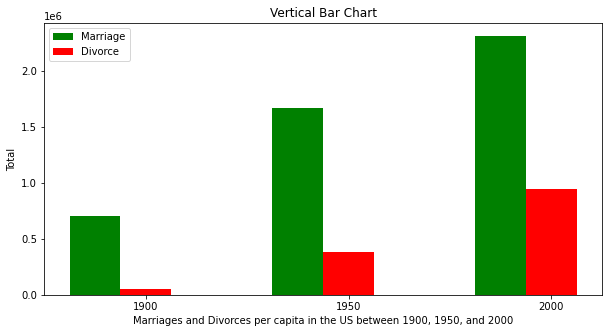

In [174]:
import numpy as np
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 5])
# Data to be plotted
marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

X = np.arange(len(marriage))
plt.bar(X, marriage, color = 'green', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'red', width = 0.25)
plt.legend(['Marriage', 'Divorce'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("Vertical Bar Chart")
plt.xlabel('Marriages and Divorces per capita in the US between 1900, 1950, and 2000')
plt.ylabel('Total')
plt.show()

# Answer 8

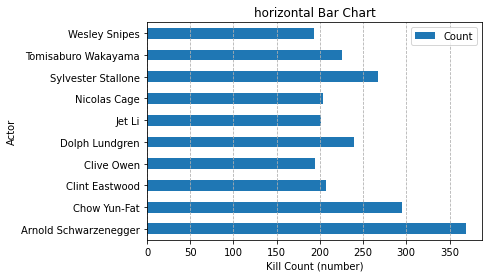

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# read data.csv file into pandas DataFrame object called df
Actor = pd.read_csv('actor_kill_counts.csv')

# plot data as horizontal bar graph

Actor.plot.barh(x='Actor', y='Count')

# set axis labels
plt.title("horizontal Bar Chart")
plt.ylabel('Actor')
plt.xlabel('Kill Count (number)')

# show vertical grid lines (optional)
plt.grid(axis='x', linestyle = '--')

# show the plot
plt.show()

# Answer 9

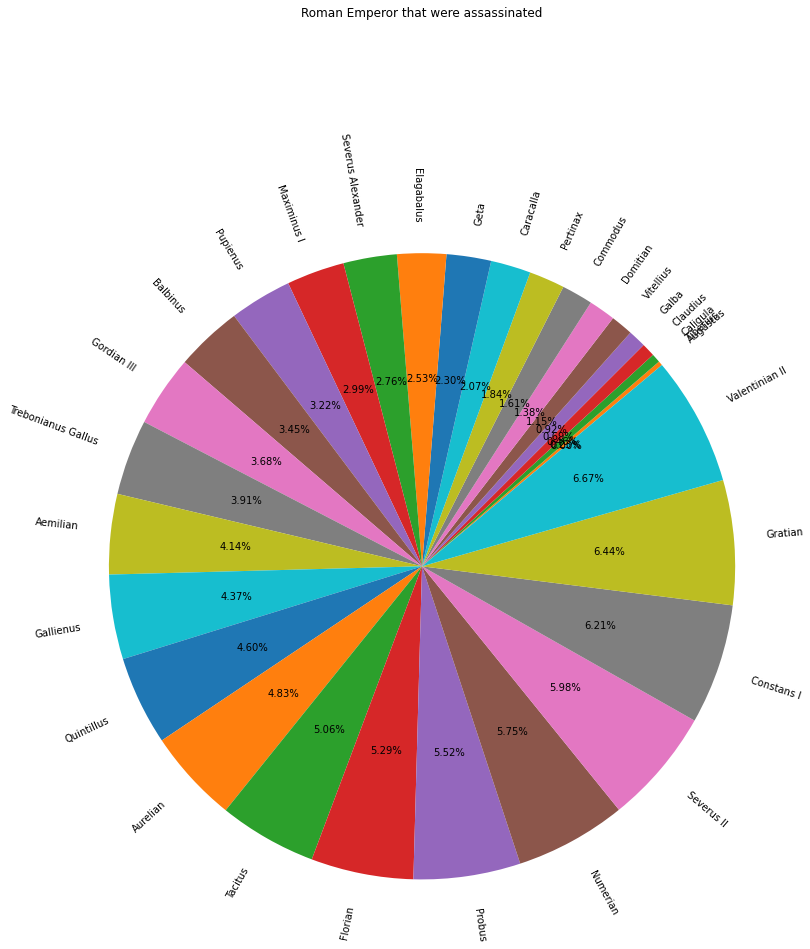

In [176]:
import matplotlib.pyplot as plt
import os
import pandas as pd

romanEmperors= pd.read_csv('roman-emperor-reigns.csv')
assassinationDeath = romanEmperors[romanEmperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
emperor = assassinationDeath["Emperor"]
causeOfDeath = assassinationDeath["Cause_of_Death"]
plt.pie(range(len(causeOfDeath)), labels=emperor,autopct='%1.2f%%', startangle=40, radius=0.045 * 80,rotatelabels = 300)
plt.title("Roman Emperor that were assassinated", y=3)
plt.show()

# Answer 10

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

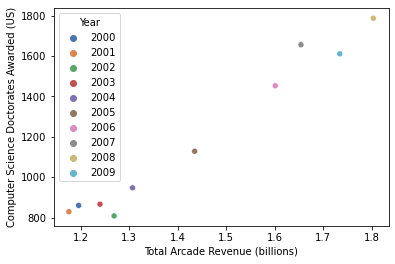

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
arcade_revenuew = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', palette ='deep',data=arcade_revenuew)